<a href="https://colab.research.google.com/github/Parth-nXp/DNN_mini_project/blob/main/moons_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
X, Y = make_moons(n_samples = 1000, noise = 0.1)
data_df = pd.DataFrame({'x_coord_1' : X[:,0], 'x_coord_2': X[:,1], 'y': Y})
data_df.head()

,x_coord_1,x_coord_2,y
0,0.371003,-0.337769,1
1,0.609205,0.911262,0
2,0.913636,0.571792,0
3,1.616750,-0.257398,1
4,0.837145,-0.463651,1


In [3]:
print(data_df['y'].unique())
print(data_df['y'].value_counts())

[1 0]
y
1    500
0    500
Name: count, dtype: int64


In [4]:
original_df = data_df.copy()
for column in data_df.columns:
  data_df[column] = data_df[column] / data_df[column].abs().max()

data_df.head()

,x_coord_1,x_coord_2,y
0,0.167394,-0.254349,1.0
1,0.274869,0.686205,0.0
2,0.412227,0.430575,0.0
3,0.729467,-0.193828,1.0
4,0.377714,-0.349141,1.0


In [5]:
X = np.array(data_df.iloc[:, :-1])
y = np.array(data_df.iloc[:, -1])
print(X.shape)

(1000, 2)


In [6]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]

In [7]:
train_data = dataset(X, y)
train_loader = DataLoader(train_data, batch_size = 32, shuffle =True)

In [17]:
hidden_layer_1_neurons = 64
hidden_layer_2_neurons = 32

class my_model(nn.Module):
  def __init__(self):
    super(my_model, self).__init__()

    self.input_layer = nn.Linear(2, hidden_layer_1_neurons)
    self.relu = nn.ReLU()
    self.hidden_layer = nn.Linear(hidden_layer_1_neurons, hidden_layer_2_neurons)
    self.output_layer = nn.Linear(hidden_layer_2_neurons, 1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, x):
    x = self.input_layer(x)
    x = self.relu(x)
    x = self.hidden_layer(x)
    x = self.relu(x)
    x = self.output_layer(x)
    x = self.sigmoid(x)
    return x


model = my_model().to(device)

In [18]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             192
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 32]           2,080
              ReLU-4                   [-1, 32]               0
            Linear-5                    [-1, 1]              33
           Sigmoid-6                    [-1, 1]               0
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [19]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 0.01)

In [20]:
total_loss_plot = []
epochs = 100

for epoch in range(epochs):
  total_loss = 0

  for data in train_loader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss = criterion(prediction, labels)
    total_loss += batch_loss.item()

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()


  total_loss_plot.append(round(total_loss/1000, 4))
  if (epoch+1) %10 ==0:
    print(f'epoch: {epoch+1}, loss = {total_loss_plot[-1]}')
    print("="*25)

epoch: 10, loss = 0.0001
epoch: 20, loss = 0.0
epoch: 30, loss = 0.0
epoch: 40, loss = 0.0
epoch: 50, loss = 0.0
epoch: 60, loss = 0.0
epoch: 70, loss = 0.0
epoch: 80, loss = 0.0
epoch: 90, loss = 0.0
epoch: 100, loss = 0.0


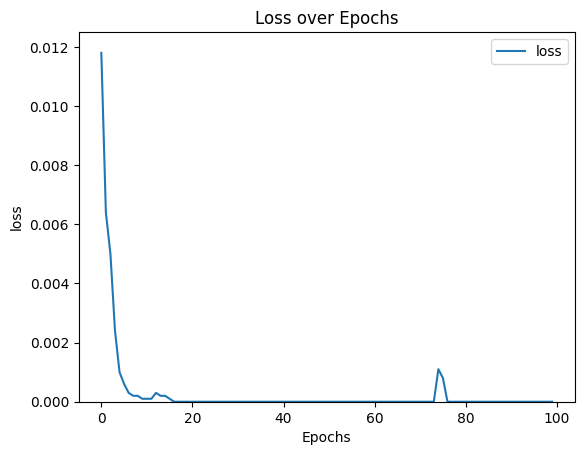

In [28]:
plt.plot(total_loss_plot, label = 'loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.ylim([0,0.0125])
plt.legend()
plt.show()
